In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
rune_df = pd.read_csv("data/Rune/Rune_avg_price_data.csv")
xp_df = pd.read_csv("data/XP/XP_CML_data.csv")
xp_df = xp_df[['timestamp', 'runecrafting','magic']] # keeping necessary columns
rune_df['timestamp'] = rune_df['timestamp'] - 86400  # shifting all timestamps back 1 day
print(rune_df.shape)
print(xp_df.shape)

(233, 14)
(242, 3)


In [12]:
merged = xp_df.merge(rune_df, on='timestamp', how='inner')
merged['date'] = pd.to_datetime(merged ['timestamp'], unit='s') 
merged.drop('timestamp', 'columns', inplace=True)
pd.set_option('display.max_rows', None)
print(merged)

     runecrafting         magic  fire_rune  water_rune  air_rune  earth_rune  \
0     49883.97986   48308.09132   4.889955    4.000000  4.770382    4.556719   
1     51993.66614   32651.93463   4.858899    4.515777  4.576137    4.000000   
2     47770.18943   45029.75531   4.562090    4.280563  4.586422    4.334397   
3     45462.94360   35874.82828   4.000000    4.534332  4.000000    4.211678   
4     54011.39302   38005.79090   4.891418    4.711043  4.954055    4.000000   
5     50048.54756   20505.27639   4.000000    4.000000  4.000000    4.000000   
6     49713.71743   27364.65031   4.955728    4.000000  4.000000    4.548458   
7     50574.26821   35316.96080   4.891442    4.717161  4.809010    4.699981   
8     40134.32818   35417.52686   4.917226    4.820476  4.819531    4.787435   
9     43612.61069   34414.50341   4.971493    4.974847  4.894737    4.361178   
10    48079.62411   49952.47615   4.968464    4.000000  4.929080    4.431711   
11    42618.27518   52471.18812   4.9434

In [17]:
group1 = merged.loc[merged['date'] < '2022-01-01']
group2 = merged.loc[(merged['date'] > '2022-01-01') & (merged['date'] < '2022-08-01')]
group3 = merged.loc[merged['date'] > '2022-08-01']

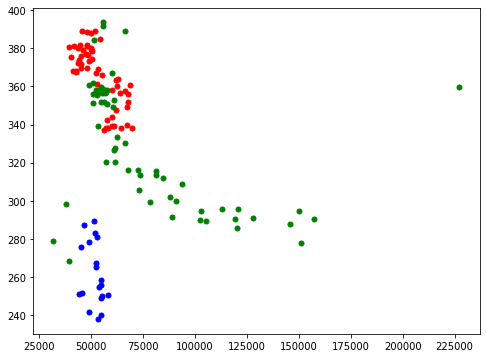

In [19]:
rune = 'blood_rune'
xp = 'runecrafting'

plt.plot(group1[xp], group1[rune], 'o', markersize=5, color='red')
plt.plot(group2[xp], group2[rune], 'o', markersize=5, color='green') # over the summer
plt.plot(group3[xp], group3[rune], 'o', markersize=5, color='blue') # september till mid october

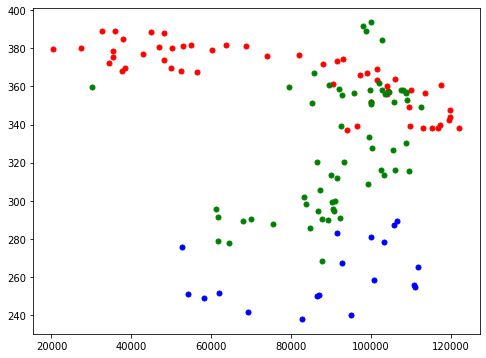

In [20]:
rune = 'blood_rune'
xp = 'magic'

plt.plot(group1[xp], group1[rune], 'o', markersize=5, color='red')
plt.plot(group2[xp], group2[rune], 'o', markersize=5, color='green')
plt.plot(group3[xp], group3[rune], 'o', markersize=5, color='blue')

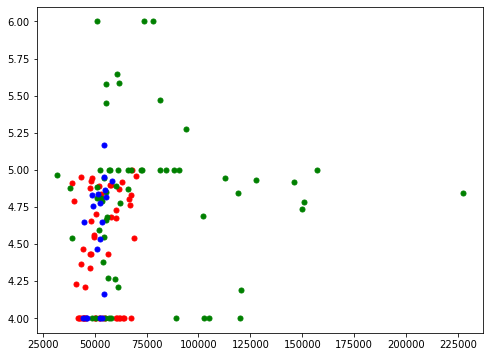

In [23]:
rune = 'earth_rune'
xp = 'runecrafting'

plt.plot(group1[xp], group1[rune], 'o', markersize=5, color='red')
plt.plot(group2[xp], group2[rune], 'o', markersize=5, color='green')
plt.plot(group3[xp], group3[rune], 'o', markersize=5, color='blue')

In [ ]:
plt.figure(figsize=(20,10))

x = rune_df.values #returns a numpy array
rune_df = pd.DataFrame(min_max_scaler.fit_transform(x), columns=rune_df.columns)
c=rune_df.corr()

sns.heatmap(c, annot=True)

In [ ]:
plt.figure(figsize=(20,10))

x = xp_df.values #returns a numpy array
xp_df = pd.DataFrame(min_max_scaler.fit_transform(x), columns=xp_df.columns)

d=xp_df.corr()
sns.heatmap(d, annot=True)

In [ ]:
plt.figure(figsize=(20, 10))
e=pd.concat([rune_df,xp_df],axis=1).corr()
sns.heatmap(e, annot=True)